In [63]:
## Training different Linear Models with Cleaned Algerian Forest Fire dataset

In [64]:
# importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [65]:
# loading cleaned dataset
df = pd.read_csv('Algerian_Forest_Fire_Cleaned.csv')
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [66]:
# dropping day, month, year columns as they are irrelevant in training model
df.drop(['day','month','year'],axis=1,inplace=True)

In [67]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [68]:
# dealing 'Classes' column
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [69]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),0,1)
print(df.head())
print(df.tail())

   Temperature  RH  Ws  Rain  FFMC  DMC    DC  ISI  BUI  FWI  Classes  Region
0           29  57  18   0.0  65.7  3.4   7.6  1.3  3.4  0.5        0       0
1           29  61  13   1.3  64.4  4.1   7.6  1.0  3.9  0.4        0       0
2           26  82  22  13.1  47.1  2.5   7.1  0.3  2.7  0.1        0       0
3           25  89  13   2.5  28.6  1.3   6.9  0.0  1.7  0.0        0       0
4           27  77  16   0.0  64.8  3.0  14.2  1.2  3.9  0.5        0       0
     Temperature  RH  Ws  Rain  FFMC   DMC    DC  ISI   BUI  FWI  Classes  \
238           30  65  14   0.0  85.4  16.0  44.5  4.5  16.9  6.5        1   
239           28  87  15   4.4  41.1   6.5   8.0  0.1   6.2  0.0        0   
240           27  87  29   0.5  45.9   3.5   7.9  0.4   3.4  0.2        0   
241           24  54  18   0.1  79.7   4.3  15.2  1.7   5.1  0.7        0   
242           24  64  15   0.2  67.3   3.8  16.5  1.2   4.8  0.5        0   

     Region  
238       1  
239       1  
240       1  
241       1  

#### Seggregating the data into training and test data (dependent and independent features)

In [70]:
# independent features
X = df.drop('FWI',axis =1)

# dependent feature
y = df['FWI']

In [71]:
X.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0


In [72]:
y.head(3)

,FWI
0,0.5
1,0.4
2,0.1


#### Train Test Split

In [73]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [74]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((182, 11), (61, 11), (182,), (61,))

#### Feature Selection based on Correlation
 The features which are highly correlated with each other can be dropped.<br>
 A threshold is provided by a domain expert.<br>
 The features which have correlation coeff greater than threshold can be dropped.

In [75]:
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


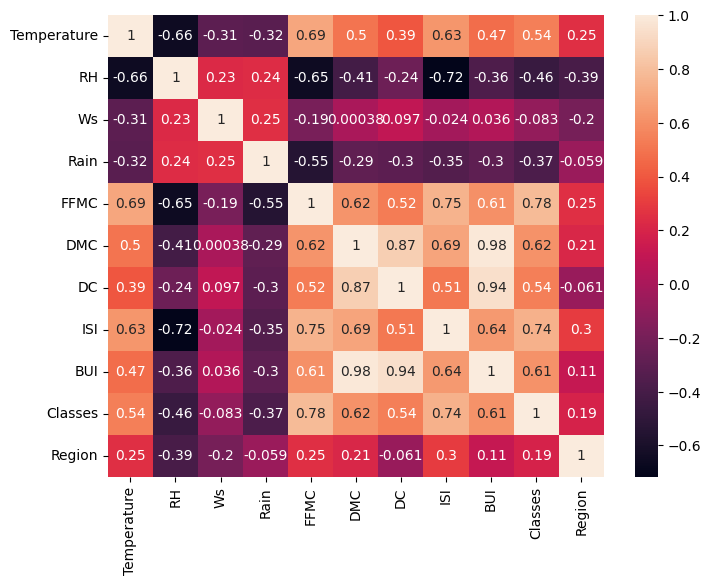

In [76]:
# checking for multi-collinearity

corr_ = X_train.corr()
plt.figure(figsize=(8,6))
sns.heatmap(corr_, annot=True)
plt.show()

In [77]:
# defining the function to find highly correlated columns

def correlation(dataset, threshold):
    col_corr = set()  # set: to remove repeated column names
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:  # this loop condition makes sure to process only lower triangle in corr matrix
                colname = corr_matrix.columns[i]         # as corr() matrix is a symmetric matrix, reduce cal and optimized
                col_corr.add(colname)
    return col_corr

In [78]:
# threshold provided by domain expertise
corr_features = correlation(X_train,0.85)

In [79]:
corr_features

{'BUI', 'DC'}

In [80]:
# dropping the columns when corr is higher than threshold
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape, X_test.shape

((182, 9), (61, 9))

#### Feature Scaling or Standardization

In [81]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled  = scaler.transform(X_test)

In [82]:
X_train_scaled

array([[-0.84284248,  0.78307967,  1.29972026, ..., -0.62963326,
        -1.10431526, -0.98907071],
       [-0.30175842,  0.64950844, -0.59874754, ..., -0.93058524,
        -1.10431526,  1.01105006],
       [ 2.13311985, -2.08870172, -0.21905398, ...,  2.7271388 ,
         0.90553851,  1.01105006],
       ...,
       [-1.9250106 ,  0.9166509 ,  0.54033314, ..., -1.06948615,
        -1.10431526, -0.98907071],
       [ 0.50986767, -0.21870454,  0.16063958, ...,  0.5973248 ,
         0.90553851,  1.01105006],
       [-0.57230045,  0.98343651,  2.05910739, ..., -0.86113478,
        -1.10431526, -0.98907071]])

#### Box plot to understand Effect of Standard Scaler

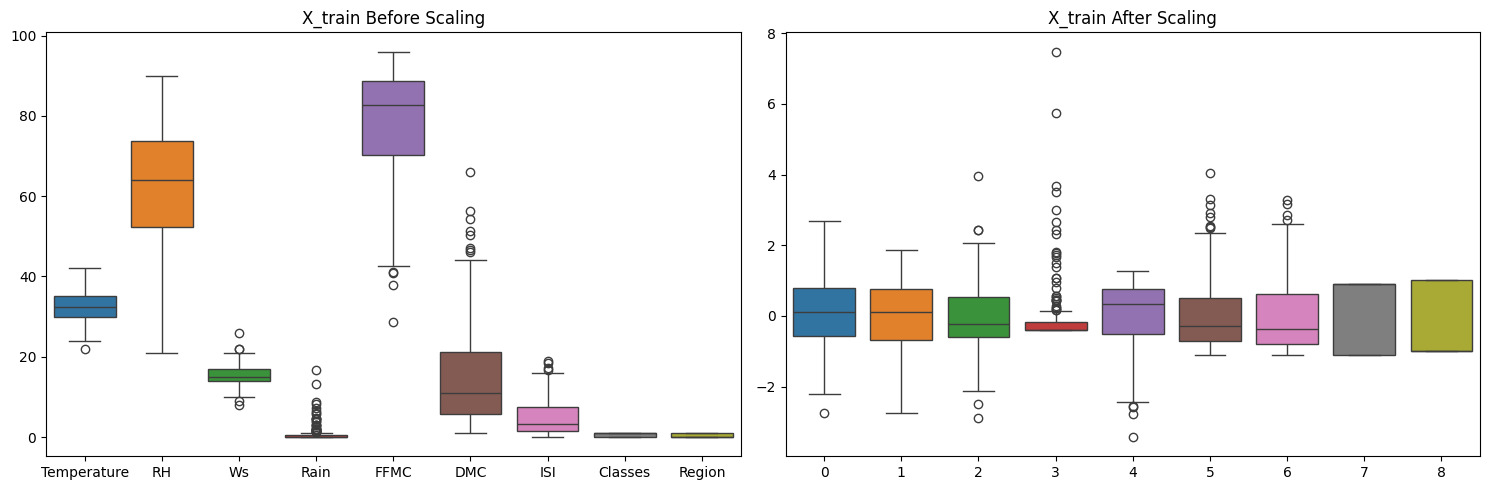

In [83]:
plt.subplots(figsize=(15, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=X_train)
plt.title('X_train Before Scaling')

plt.subplot(1, 2, 2)
sns.boxplot(data=X_train_scaled)
plt.title('X_train After Scaling')

plt.tight_layout()
plt.show()

### Linear Regression Model

Mean Absolute Error is :  0.5468236465249986
R_2 Score is :  0.9847657384266951


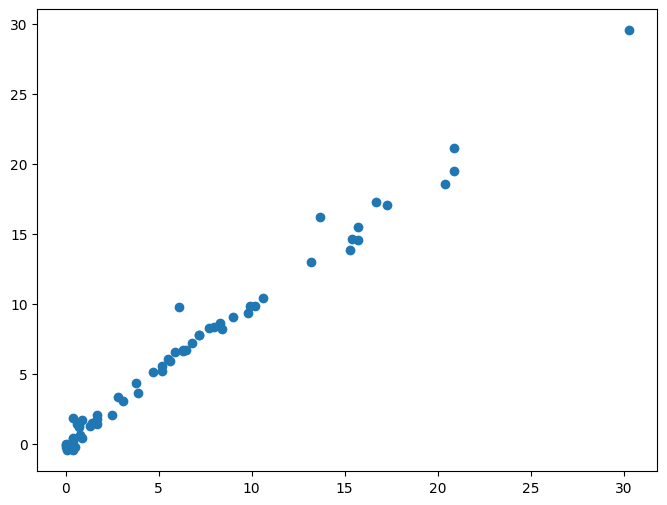

In [84]:
from os import access
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

linreg = LinearRegression()

linreg.fit(X_train_scaled,y_train)

y_pred = linreg.predict(X_test_scaled)

mae = mean_absolute_error(y_test, y_pred)

r2s = r2_score(y_test,y_pred)

print('Mean Absolute Error is : ',mae)
print('R_2 Score is : ',r2s)

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.show()

In [85]:
# Summary

# since we we are getting mae=0.5 which is less, means our model is performing well
# and r2_score is also high, which means our model has higher accuracy
# also scatter plot between 'y_test' and 'y_pred' is of type linear means there is good accuracy

### Lasso Regression

Mean Absolute Error is :  1.133175994914409
R_2 Score is :  0.9492020263112388


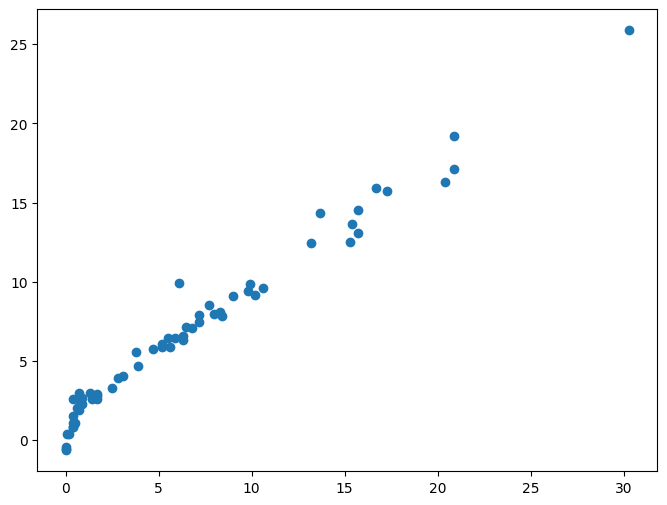

In [86]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

lass = Lasso()

lass.fit(X_train_scaled,y_train)

y_pred_lasso = lass.predict(X_test_scaled)

mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
r2s_lasso = r2_score(y_test, y_pred_lasso)

print('Mean Absolute Error is : ',mae_lasso)
print('R_2 Score is : ',r2s_lasso)

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred_lasso)
plt.show()

In [87]:
# summary
# default lambda =1

# observe the error is increased to 1.1 as opposed to 0.5 in linear regression
# accuracy decreased

### Cross validatation Lasso

In [88]:
from sklearn.linear_model import LassoCV
lassocv=LassoCV(cv=5)
lassocv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

Mean absolute error 0.619970115826343
R2 Score 0.9820946715928275


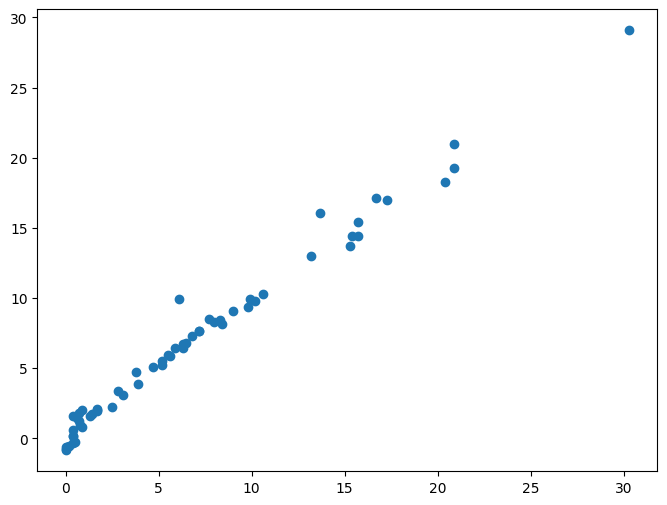

In [89]:
y_pred=lassocv.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.show()

### Ridge Regression Model

Mean absolute error 0.5642305340105692
R2 Score 0.9842993364555513


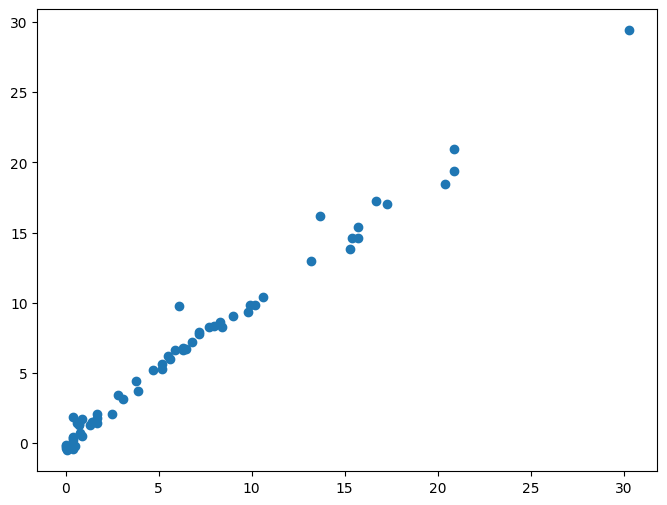

In [90]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

ridge=Ridge()

ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.show()

### Cross Validation Ridge

Mean absolute error 0.5642305340105692
R2 Score 0.9842993364555513


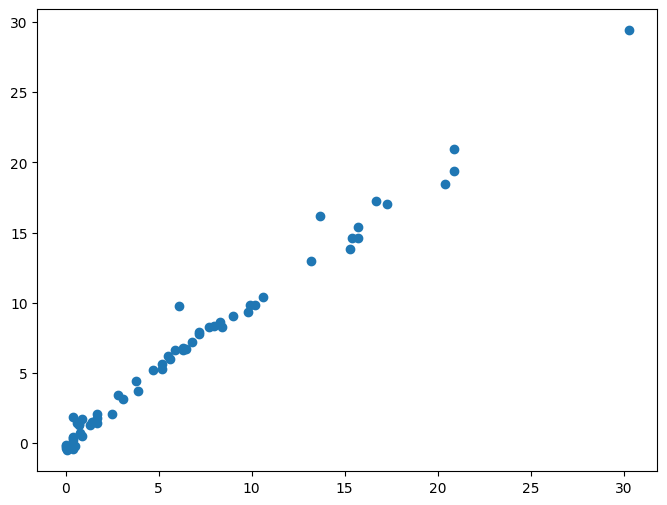

In [91]:
from sklearn.linear_model import RidgeCV

ridgecv=RidgeCV(cv=5)

ridgecv.fit(X_train_scaled,y_train)
y_pred=ridgecv.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.show()

In [92]:
# to get which parameters have been selected
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

### Elastic Net

Mean absolute error 1.8822353634896005
R2 Score 0.8753460589519703


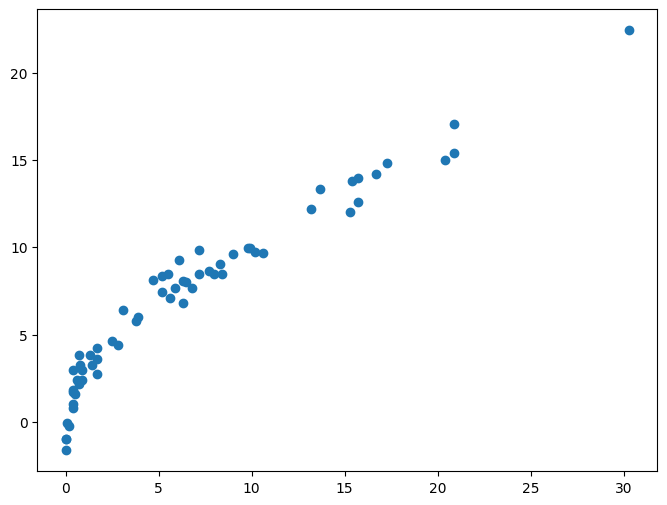

In [93]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

elastic=ElasticNet()

elastic.fit(X_train_scaled,y_train)
y_pred=elastic.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.show()

### Cross Validation ElasticNet

Mean absolute error 0.6575946731430898
R2 Score 0.9814217587854941


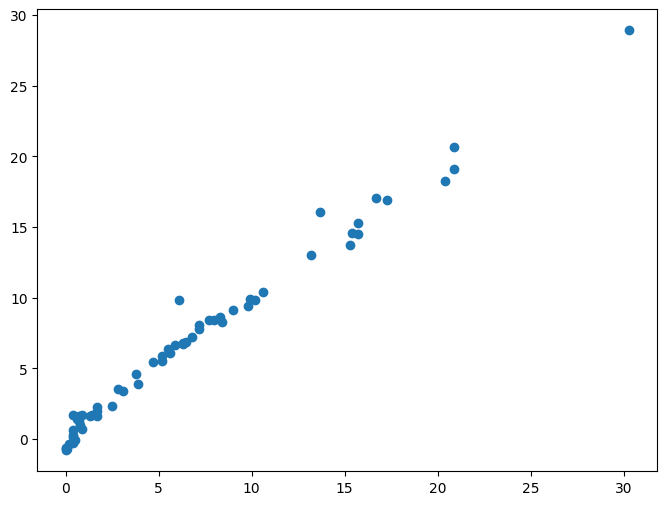

In [94]:
from sklearn.linear_model import ElasticNetCV

elasticcv=ElasticNetCV(cv=5)

elasticcv.fit(X_train_scaled,y_train)
y_pred=elasticcv.predict(X_test_scaled)

mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)

print("Mean absolute error", mae)
print("R2 Score", score)

plt.figure(figsize=(8,6))
plt.scatter(y_test,y_pred)
plt.show()

In [95]:
elasticcv.alphas_

array([14.11706004, 13.16561744, 12.27829889, 11.45078264, 10.67903821,
        9.95930678,  9.28808283,  8.66209714,  8.07830078,  7.53385034,
        7.02609405,  6.55255882,  6.11093829,  5.6990815 ,  5.31498248,
        4.95677045,  4.62270071,  4.31114616,  4.02058933,  3.74961507,
        3.49690356,  3.26122397,  3.04142839,  2.83644629,  2.64527931,
        2.46699633,  2.30072904,  2.1456676 ,  2.00105679,  1.86619226,
        1.74041714,  1.62311885,  1.51372607,  1.411706  ,  1.31656174,
        1.22782989,  1.14507826,  1.06790382,  0.99593068,  0.92880828,
        0.86620971,  0.80783008,  0.75338503,  0.7026094 ,  0.65525588,
        0.61109383,  0.56990815,  0.53149825,  0.49567705,  0.46227007,
        0.43111462,  0.40205893,  0.37496151,  0.34969036,  0.3261224 ,
        0.30414284,  0.28364463,  0.26452793,  0.24669963,  0.2300729 ,
        0.21456676,  0.20010568,  0.18661923,  0.17404171,  0.16231189,
        0.15137261,  0.1411706 ,  0.13165617,  0.12278299,  0.11

In [96]:
# Now out of all these models, we will select the best model
# we select the ridge regression model with highest accuracy 0.9842
# we can select any model

# we will be pickling the best model and standard scalar for deployment

In [97]:
ridge

Ridge()

In [98]:
scaler

StandardScaler()

In [99]:
import pickle

In [100]:
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(ridge,open('ridge.pkl','wb'))